# **Analysis of Influencing Factors in Global Film Rating**


##**1.Problem Definition**

**Project Proposal:** Improving the rating of a movie/TV series will inevitably increase its box office revenue, and understanding the different factors contributing to a movie’s high rating explains its success. We look at over 2.5 million rows of movies and TV series from the IMDB website to understand people's preferences in a show’s composition, and we also look for ways to increase a show’s rating based on selected data. In addition, we analyze the relationship between the rating of movies and their compositions (duration/votes/certificate/etc.) to provide recommendations to increase revenue for production companies.
<br>
<br>
**Data Source:**

*Raw Data Website:*
<br>
__[IMDB Official Dataset Interface](https://www.imdb.com/interfaces/)__
<br>
*Raw Data Source:*
<br>
__[IMDB Official Dataset](https://datasets.imdbws.com/)__
<br>
*Modified Data:*
<br>
__[IMDB Dataset Modified on Kaggle.com](https://www.kaggle.com/datasets/ashishjangra27/imdb-movies-dataset)__
		

*Note:* the raw data is from IMDB official website, and the data on Kaggle is modified by Ashish Jangra, a data scientist from Noida, India. 
<br>
<br>
**Motivation:**
Films and television series are entertainment topics closely related to people’s lives. By analyzing various factors contributing to a successful film, it is meaningful to discover how a movie/series should be produced that is preferred by spectators while bringing the most revenue to the companies producing it. Although it sounds ideal initially, producing an attractive and profitable show with data analytics is not without precedents, such as the success of Netflix’s House of Cards was based on extensive analytics on viewer data. 
<br>
<br>
**Report Summary:**
By examining the effects of `genre`, `certificate`, `duration`, and director on the rating of works, we draw the conclusion that, starting in 2008, consumers began to favor TV dramas over action movies as their preferred genre.Therefore, the talk show reappearance may be more popular with the audience. TV shows typically have high average ratings over relatively short periods of time in the certificates, but movies typically have low average ratings during longer average durations. TV shows may therefore earn more money when production costs are not taken into account. We draw the conclusion that the quantity of films a director produces has no bearing on the quality of those films based on the findings of our survey of directors. As a result, the quantity of a filmmaker's film and television productions need not be a major consideration when a film or television company selects a director.

In [ ]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno

In [ ]:
# Mount gdrive and read dataset from gdrive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/ba780/team project/movies.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,year,rating,certificate,duration,genre,votes,gross_income,directors_id,directors_name,stars_id,stars_name,description
0,tt4710316,Best in Sex: 2015 AVN Awards,(2015 TV Special),4.0,TV-MA,94 min,"Adult, News",124.0,0,nm1624094,Gary Miller,"nm4766272,nm2670531,nm4920605,nm6284246","Farrah Laurel Abraham,Asa Akira,Anikka Albrite...",The hottest adult stars and top adult movies a...
1,tt1281857,Naughty Novelist,(2008 Video),3.8,Not Certified,88 min,Adult,174.0,0,nm0045256,John Bacchus,"nm0128986,nm1969196,nm0451160,nm6130462","Darian Caine,Jackie Stevens,A.J. Khan,Arrora",Darian is a successful journalist but when she...
2,tt2294954,2011 AVN Awards Show,(2011 TV Special),5.7,Not Certified,83 min,"Adult, News",39.0,0,"nm1624094,nm0754845","Gary Miller,Timothy E. Sabo","nm2200343,nm2670531,nm1267549,nm3585599","Aubrey Addams,Asa Akira,Monique Alexander,Rave...",Add a Plot
3,tt6843596,Best in Sex: 2017 AVN Awards,(2017 TV Special),4.9,TV-MA,87 min,"Adult, News",225.0,0,nm1624094,Gary Miller,"nm5221471,nm2670531,nm4920605,nm3038816","Amirah Adara,Asa Akira,Anikka Albrite,Britney ...","Considered the industry's highest honor, the A..."
4,tt3705604,AVN Awards 2014,(2014 TV Special),6.7,R,82 min,"Adult, News",101.0,0,nm1624094,Gary Miller,"nm2670531,nm4920605,nm6284246,nm3992720","Asa Akira,Anikka Albrite,August Ames,Jessie An...",Erotic filmmaking superstars Chanel Preston an...


In [ ]:
# Dataset information and description
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590932 entries, 0 to 2590931
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              object 
 1   name            object 
 2   year            object 
 3   rating          float64
 4   certificate     object 
 5   duration        object 
 6   genre           object 
 7   votes           object 
 8   gross_income    object 
 9   directors_id    object 
 10  directors_name  object 
 11  stars_id        object 
 12  stars_name      object 
 13  description     object 
dtypes: float64(1), object(13)
memory usage: 276.7+ MB


,rating
count,2.590932e+06
mean,1.000326e+01
std,1.885600e+00
min,1.000000e+00
25%,1.100000e+01
50%,1.100000e+01
75%,1.100000e+01
max,1.100000e+01


##**2. Data Cleaning**

###**2.1 Check Data Missing Value Status**

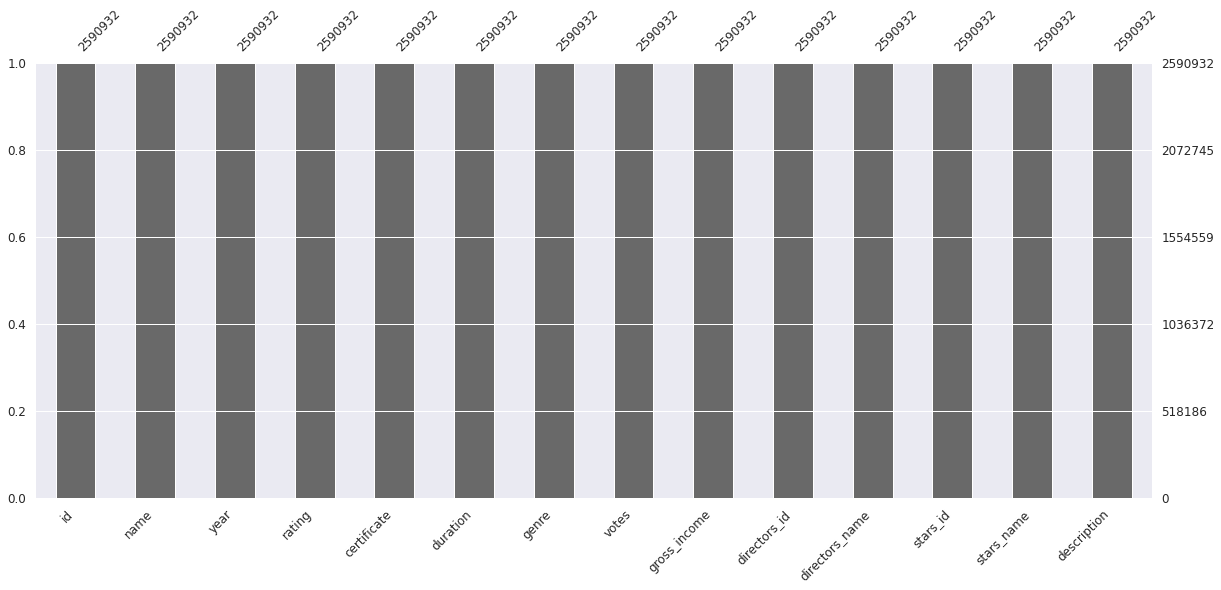

In [ ]:
#Check on the missing values of our dataset 
msno.bar(df, sort="ascending", figsize=(20,8), fontsize=12)
#Our dataset appear to have no missing value (null values)

It seems that there is no missing value in our dataset, however, a further research (Section 2.3) has been done to find the real situation of missing value in the `gross_income` column.

###**2.2 Changing Value Type**
Since this dataset's `year` column is made up of both numbers and character strings, the numbers are taken out and put in a new column, named `p_year`. At the same time, certain unreleased films in this dataset set the year column's value to a year higher than **2022**, therefore these entries need to be removed.

In [ ]:
# Extract year as integer from string, store the processed data into p_year
df['p_year'] = df['year'].str.extract('(\d+)', expand=False)

# Drop null value in p_year (after extraction, there are rows in p_year without an integer value)
df = df.dropna(subset=['p_year'])

# Transfer type of p_year into int
df['p_year'] = df['p_year'].astype(int)

# Removing the movies that have not been published yet (with p_year larger than 2022)
df = df.loc[(df['p_year'] <= 2022)]

As all columns are objects, some continuous variables are changed to int or float values, and some characters — like the separator in `votes` — are eliminated.

In [ ]:
# Extract numeric value from duration, transform data type of duration from object into integer
# Store the processed data into p_duration
df['p_duration']= df['duration'].str.extract('(\d+)', expand = False).astype('int')

# Remove ',' in votes, tranform teh data type of votes from object into float 
# Store the processed data into p_votes
df['p_votes'] = df['votes'].str.replace(',', '').astype('float', errors = 'raise')

# Remove ',' '$', 'M', in gross_income, transform data type from object into float
# Store the processed data into p_gross_income
df['gross_income'] = df['gross_income'].str.replace(',', '')
df['gross_income'] = df['gross_income'].str.replace('$', '')
df['p_gross_income'] = df['gross_income'].str.replace('M', '').astype('float', errors = 'raise')


###**2.3 `gross_income` Problem**
By querying the unique value of `gross income`, the values of `gross income` in most movies are missing. Moreover, the `gross income` column contains a significant amount of duplicated data, which is inappropriate for a numerical variable. `gross income` must be eliminated. The reason behind this issue might have been IMDB handling lost data improperly during data entering. Therefore, the "total revenue" column will not be used to avoid too many rows being deleted in our analysis。

In [ ]:
# Count unique value in gross income column
print('There are ' + str(len(df['p_gross_income'].unique())) + ' unique values in p_gross_income.')
print('However, there are ' + str(len(df['p_gross_income'])) + ' values in p_gross_income.')

# Move non-zero gross income row into a new datafram
df_gross_income = df[df['p_gross_income'] != 0]
print('After deleting zero values of gross income, there are only ' + str(len(df_gross_income['p_gross_income'])) + ' values left in p_gross_income.')

There are 10654 unique values in p_gross_income.
However, there are 2521504 values in p_gross_income.
After deleting zero values of gross income, there are only 861865 values left in p_gross_income.


###**2.4 Reorganizing the DataFrame**

In [ ]:
# Reorganize the original dataframe with relevant variables for further analysis
df = df[['id', 'name', 'p_year', 'rating', 'certificate', 'p_duration', 'genre', 'p_votes', 'p_gross_income',
         'directors_id', 'directors_name', 'stars_id', 'stars_name', 'description']]
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2521504 entries, 0 to 2590931
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              object 
 1   name            object 
 2   p_year          int64  
 3   rating          float64
 4   certificate     object 
 5   p_duration      int64  
 6   genre           object 
 7   p_votes         float64
 8   p_gross_income  float64
 9   directors_id    object 
 10  directors_name  object 
 11  stars_id        object 
 12  stars_name      object 
 13  description     object 
dtypes: float64(3), int64(2), object(9)
memory usage: 288.6+ MB


,p_year,rating,p_duration,p_votes,p_gross_income
count,2.521504e+06,2.521504e+06,2.521504e+06,2.455970e+06,1.701688e+06
mean,2.001403e+03,9.975878e+00,1.599417e+01,4.065205e+02,3.031051e+05
std,1.950942e+01,1.903964e+00,3.243553e+01,1.114478e+04,6.489499e+06
min,1.877000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.994000e+03,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.008000e+03,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.015000e+03,1.100000e+01,2.100000e+01,5.000000e+00,0.000000e+00
max,2.022000e+03,1.100000e+01,9.990000e+02,2.574832e+06,9.366622e+08


In [ ]:
df.head()

,id,name,p_year,rating,certificate,p_duration,genre,p_votes,p_gross_income,directors_id,directors_name,stars_id,stars_name,description
0,tt4710316,Best in Sex: 2015 AVN Awards,2015,4.0,TV-MA,94,"Adult, News",124.0,0.0,nm1624094,Gary Miller,"nm4766272,nm2670531,nm4920605,nm6284246","Farrah Laurel Abraham,Asa Akira,Anikka Albrite...",The hottest adult stars and top adult movies a...
1,tt1281857,Naughty Novelist,2008,3.8,Not Certified,88,Adult,174.0,0.0,nm0045256,John Bacchus,"nm0128986,nm1969196,nm0451160,nm6130462","Darian Caine,Jackie Stevens,A.J. Khan,Arrora",Darian is a successful journalist but when she...
2,tt2294954,2011 AVN Awards Show,2011,5.7,Not Certified,83,"Adult, News",39.0,0.0,"nm1624094,nm0754845","Gary Miller,Timothy E. Sabo","nm2200343,nm2670531,nm1267549,nm3585599","Aubrey Addams,Asa Akira,Monique Alexander,Rave...",Add a Plot
3,tt6843596,Best in Sex: 2017 AVN Awards,2017,4.9,TV-MA,87,"Adult, News",225.0,0.0,nm1624094,Gary Miller,"nm5221471,nm2670531,nm4920605,nm3038816","Amirah Adara,Asa Akira,Anikka Albrite,Britney ...","Considered the industry's highest honor, the A..."
4,tt3705604,AVN Awards 2014,2014,6.7,R,82,"Adult, News",101.0,0.0,nm1624094,Gary Miller,"nm2670531,nm4920605,nm6284246,nm3992720","Asa Akira,Anikka Albrite,August Ames,Jessie An...",Erotic filmmaking superstars Chanel Preston an...


###**2.5 Data Description**

| **Feature Name** | **Feature Description** | **Data Type** |
|------------------|-------------------------|---------------|
| id               | Movie ID                                       | object        |
| name             | Name of the Movie                              | object        |
| p_year           | Year of movie release                          | int64         |
| rating           | Rating of the Movie                            | float64       |
| certificate      | Movie Certification                            | object        |
| p_duration       | Duration of the Movie                          | int64         |
| genre            | Genre of the Movie                             | object        |
| p_votes          | Number of people who voted for the IMDB rating | float64       |
| directors_id     | ID of Directors who have worked on the movie   | object        |
| directors_name   | Name of Directors who have worked on the movie | object        |
| stars_id         | ID of stars who have worked on the movie       | object        |
| stars_name       | Name of stars who have worked on the movie     | object        |
| description      | Description of the movie                       | object        |

**Data Cleaning is Completed**

##**3. Detailed Analysis**

### **Heatmap**

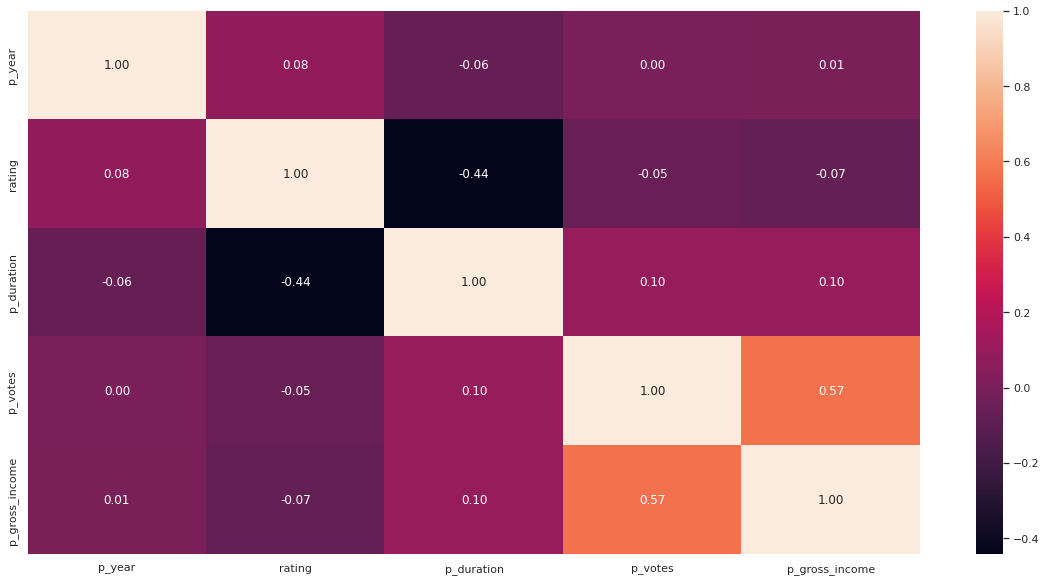

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),fmt=".2f",annot=True)



> Through the heatmap, it can be found that there is a relatively strong negative relationship between `p_duration` and `rating`. As for the relationship between `p_vote` and `p_gross_income`, since the use of `p_gross_income` is abandoned, the relationship between them will no longer be discussed.




### **Roughly Count of Genre**

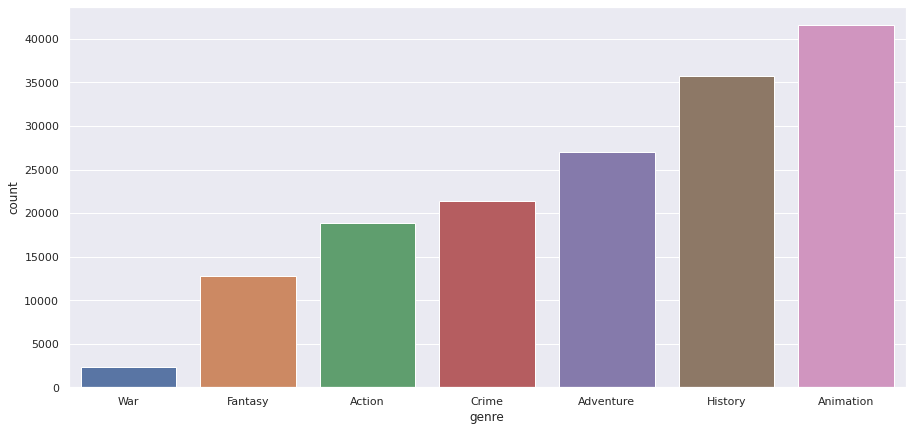

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x = df.genre, order = ['War', 'Fantasy', 'Action', 'Crime', 'Adventure', 'History', 'Animation']titanic.deck.value_counts().iloc[:3].index)

plt.show()

### **Analysis of Movies' Quantity**

In [ ]:
# Count the quantity of movies/TV group by year
pre = df.groupby(by ='p_year').agg({"id":"count"}).rename(columns={'id': 'Count'})

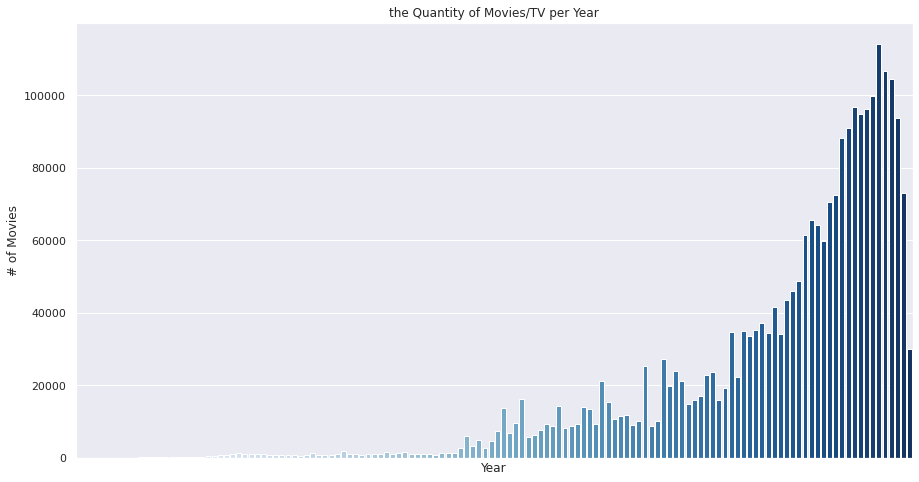

In [ ]:
# Make barplot for the quantity of movies/TV group by year
plt.figure(figsize = (15, 8))
plt.title('the Quantity of Movies/TV per Year')
ax = sns.barplot(x = pre.index,y ='Count',data=pre, palette = 'Blues')
ax.set_xticks([])
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('# of Movies')
plt.show()

From the graph above, it can be found that most of the film and television products were born in recent decades. This analysis wants to compare the changing trends of film and television products, so ***the median of the year will be used as a dividing line to compare the differences in film and television products***.

###**3.1 Question 1**
**Based on the ratings, find the median of all the years in which the movies are presented. What has happened in audience taste for genres during first half of the years compared with the second half of the years?**

In [ ]:
#Check the median of years of all movies
print('Median of Years:', round(df['p_year'].median()))

Median of Years: 2008


IMDB marks unrated or unvoted movies as 10 or 11, and this has appeared in a large part of the entire dataset. Therefore, this part of the dataset needs to be removed separately in a new *dataframe* to avoid affecting the integrity of the entire dataset. Unvoted and 0-duration films are also removed.

In [ ]:
# Check the description of rating column
df['rating'].describe()

# Remove unrated movies, which has rating of 10 or 10+
df_q = df[df['rating'] < 10]

# Remove unvoted movies and movies with duration equals to 0 minutes
df_q = df_q[(df_q['p_votes'] != 0) & (df_q['p_duration'] != 0)]


Since some movies have multiple genres, the genre list is then splited into multiple rows, so the movie `id` is having a one-to-many relationship with `genre` (one movie can have different genres, therefore appears in multiple rows.) 

In [ ]:
# Expand genre list into several rows
df_q1 = df_q
df_q1['genre'] = df_q1['genre'].map(lambda x: x.split(','))
df_q1 = df_q1.explode('genre')
df_q1.head()

,id,name,p_year,rating,certificate,p_duration,genre,p_votes,p_gross_income,directors_id,directors_name,stars_id,stars_name,description
0,tt4710316,Best in Sex: 2015 AVN Awards,2015,4.0,TV-MA,94,Adult,124.0,0.0,nm1624094,Gary Miller,"nm4766272,nm2670531,nm4920605,nm6284246","Farrah Laurel Abraham,Asa Akira,Anikka Albrite...",The hottest adult stars and top adult movies a...
0,tt4710316,Best in Sex: 2015 AVN Awards,2015,4.0,TV-MA,94,News,124.0,0.0,nm1624094,Gary Miller,"nm4766272,nm2670531,nm4920605,nm6284246","Farrah Laurel Abraham,Asa Akira,Anikka Albrite...",The hottest adult stars and top adult movies a...
1,tt1281857,Naughty Novelist,2008,3.8,Not Certified,88,Adult,174.0,0.0,nm0045256,John Bacchus,"nm0128986,nm1969196,nm0451160,nm6130462","Darian Caine,Jackie Stevens,A.J. Khan,Arrora",Darian is a successful journalist but when she...
2,tt2294954,2011 AVN Awards Show,2011,5.7,Not Certified,83,Adult,39.0,0.0,"nm1624094,nm0754845","Gary Miller,Timothy E. Sabo","nm2200343,nm2670531,nm1267549,nm3585599","Aubrey Addams,Asa Akira,Monique Alexander,Rave...",Add a Plot
2,tt2294954,2011 AVN Awards Show,2011,5.7,Not Certified,83,News,39.0,0.0,"nm1624094,nm0754845","Gary Miller,Timothy E. Sabo","nm2200343,nm2670531,nm1267549,nm3585599","Aubrey Addams,Asa Akira,Monique Alexander,Rave...",Add a Plot


The average `rating` for each `genre` should then be calculated separately for the rows extracted before and after the year 2008. Finally, create individual bar plots for each of them.

In [ ]:
# Select movies that are produced after 2008
aft_2008 = df_q1[(df_q1['p_year'] > 2008) & (df_q1.id)]

# Select movies that are produced before 2008
be4_2008 = df_q1[(df_q1['p_year'] < 2008) & (df_q1.id)]

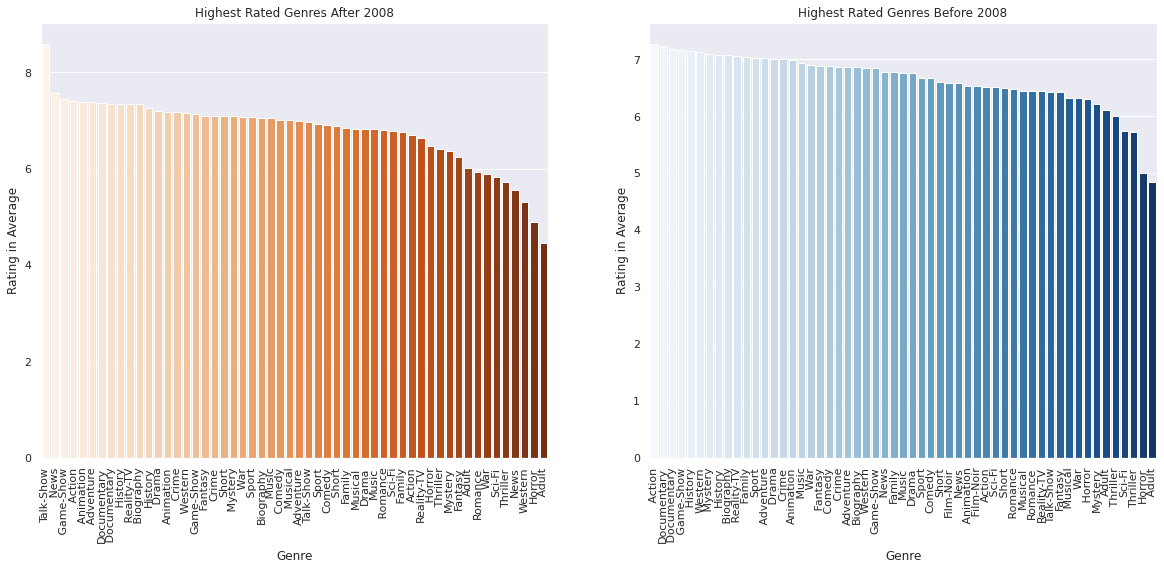

In [ ]:
# Find the average values of rating after 2008 grouped by genre and sort the outcome with descending
genre_df1 = aft_2008.groupby(by ='genre').agg({"rating":"mean"})
genre_df1 = genre_df1.sort_values(by ='rating', ascending = False)
genre_df1

# Find the average values of rating before 2008 grouped by genre and sort the outcome with descending
genre_df2 = be4_2008.groupby(by ='genre').agg({"rating":"mean"})
genre_df2 = genre_df2.sort_values(by ='rating', ascending = False)
genre_df2

# Make barplot for the average rating of each genre
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.title('Highest Rated Genres After 2008')

sns.barplot(x = genre_df1.index, y ='rating', data = genre_df1, palette = 'Oranges')
plt.xlabel('Genre')
plt.ylabel('Rating in Average')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
plt.title('Highest Rated Genres Before 2008')
sns.barplot(x = genre_df2.index,y ='rating',data=genre_df2, palette = 'Blues')
plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Rating in Average')
plt.show()

####**Answer to Question 1**


> **The median of `p_year` in which all movies are presented is 2008. In terms of `genre`, we can see a clear difference in the audience's taste before and after 2008. Before 2018, with `Action` being first place, there is not much difference between each genre. However, after 2008, with `Talk-show` being first place, there is a huge gap between `Talk-show` and others.**



### **Detailed Analysis of Votes by Genre**

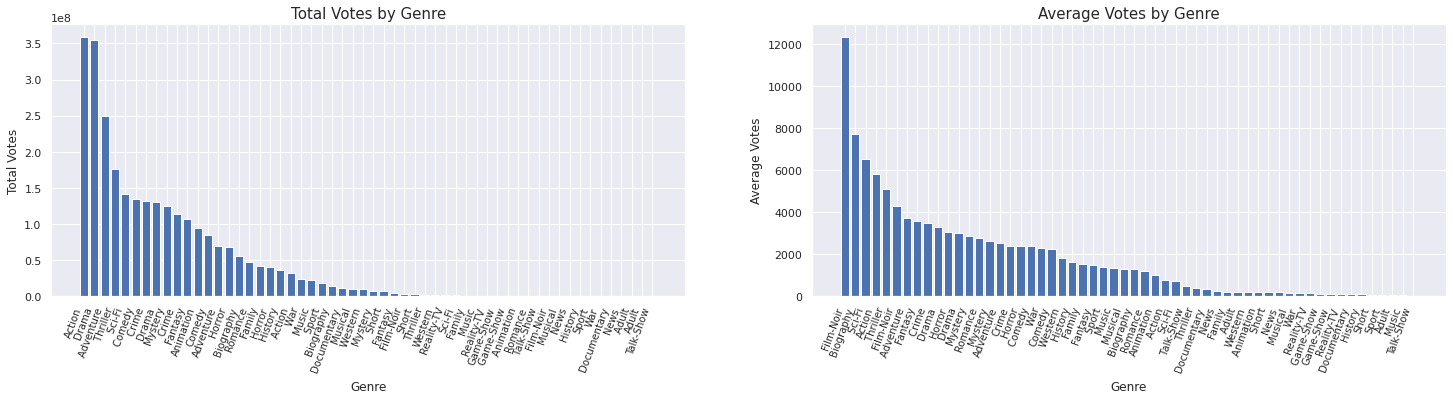

In [ ]:
#Plot a graph describing total/avaerage votes of different genre. 

genre_group = df_q1.groupby(['genre'])
df_q1_genreSum = genre_group.sum().sort_values('p_votes', ascending = False)
df_q1_genreAve = genre_group.mean().sort_values('p_votes', ascending = False)

fig = plt.figure(figsize = (25, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.bar(df_q1_genreSum.index, df_q1_genreSum['p_votes'])
ax1.set_xticklabels(df_q1_genreSum.index, rotation = 70, horizontalalignment = 'right', fontsize = 10)

ax1.set_title('Total Votes by Genre', fontsize = 15)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Total Votes')

ax2.bar(df_q1_genreAve.index, df_q1_genreAve['p_votes'])
ax2.set_xticklabels(df_q1_genreAve.index, rotation = 70, horizontalalignment = 'right', fontsize = 10)

ax2.set_title('Average Votes by Genre', fontsize = 15)
ax2.set_xlabel('Genre')
ax2.set_ylabel('Average Votes')

plt.show()

### **3.2 Question 2**
**Find the films/TV series with the highest rating in `Talk-Show` after 2008, and the films/TV series with the highest rating in `Action` before 2008.**

In [ ]:
# Extract rows after 2008 and genre is equal to Talk-Show
a = aft_2008[['name', 'p_year', 'rating']][(aft_2008['p_year'] >= 2008) & (aft_2008['genre'] == 'Talk-Show')]
a

,name,p_year,rating
2145106,Dead Talk Live,2020,8.6


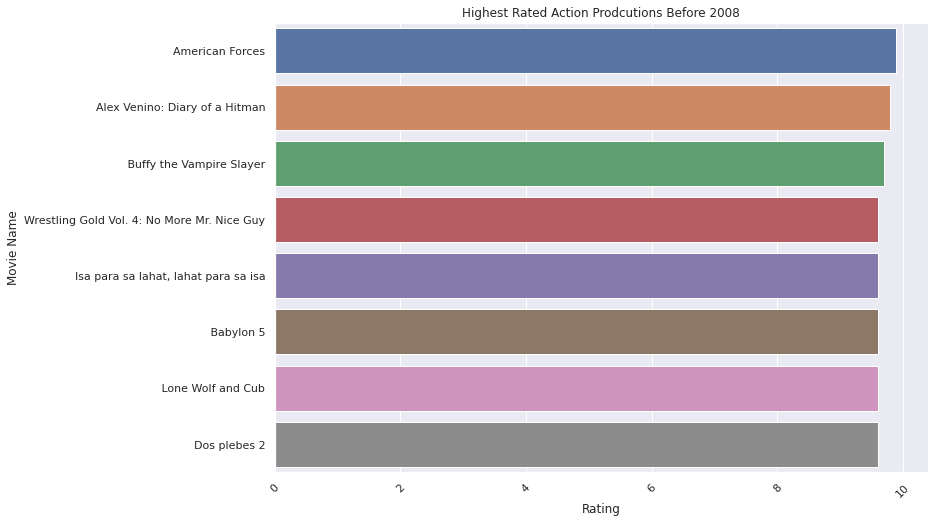

<Figure size 1440x576 with 0 Axes>

In [ ]:
# Extract rows before 2008 and genre is equal to Action
b = be4_2008[['name', 'p_year', 'rating']][(be4_2008['p_year'] < 2008 ) & (be4_2008['genre'] == 'Action')]
b = b.sort_values(by = 'rating', ascending = False).head(10)

# Create barplot for question 2
g = sns.barplot(data = b, y = 'name', x = 'rating')
plt.xticks(rotation = 45)
plt.title("Highest Rated Action Prodcutions Before 2008")
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.figure(figsize = (20, 8))
plt.show()

####**Answer to Question 2**


> **From our analysis, the production with the highest rating in the genre `Talk-Show` is `Dead Talk Live`, which is interesting since there is only one product in this genre before 2008. After 2008, the genre with the highest rating: `Action` has the following show being its top-ranked list: `American Forces` , `Alex Venino` , `Buffy the Vampire Slayer`.**


***Analysis of genre and rating in movies ends here.***

***Detailed analysis of certificate and rating in movies begins.***


### **3.3 Question 3**
**Which certificate has the highest average rating?**

There are many inappropriate certificates in the dataset, so the ones that are not adequate for analysis are removed, such as `Banned`. At the same time, ambiguous classifications such as `Passed`, `Approved` etc are also eliminated. The processed dataset in Q3 is also stored separately in a new *dataframe*: `df_q3` to avoid affecting the integrity of the original dataset.

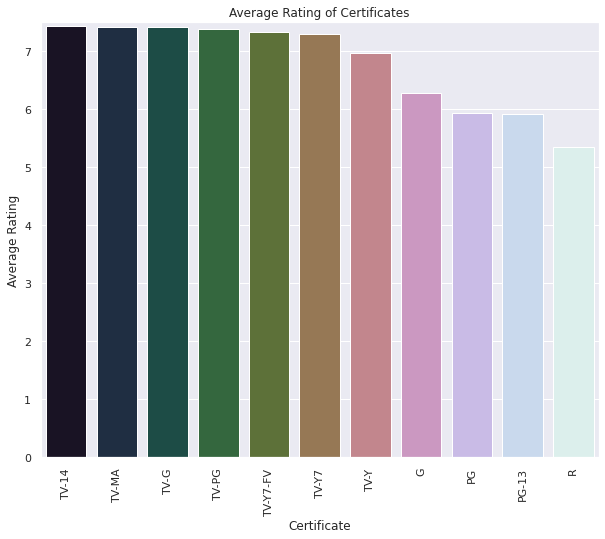

In [ ]:
# Remove inadequate certificate
df_q3 = df_q[(df_q['certificate'] != '(Banned)') &
              (df_q['certificate'] != 'Passed') &
              (df_q['certificate'] != 'Approved') &
              (df_q['certificate'] != 'Banned') &
              (df_q['certificate'] != 'Not Rated') &
              (df_q['certificate'] != 'Unrated') &
              (df_q['certificate'] != 'Open') &
              (df_q['certificate'] != 'Not Certified')]

# Remove certificate less than 1000
df_q3 = df_q3.drop(df_q3.groupby('certificate')['rating'].filter(lambda g: g.count() < 1000).index)
sol = df_q3.groupby('certificate')['rating'].describe().sort_values('mean', ascending = False)

# Plot the graph of certificates with the highest average rating
plt.figure(figsize=(10,8))
g = sns.barplot(x=sol.index, y='mean',data=sol, palette = 'cubehelix')
g.set(ylim = (0, 7.5))
plt.xticks(rotation = 90)
plt.title("Average Rating of Certificates")
plt.xlabel('Certificate')
plt.ylabel('Average Rating')
plt.show()

####**Answer to Question 3**

> **`TV-14`, `TV-MA`, and `TV-G` certificates have the highest average rating, and the lowest average rating certificates are `R`, `PG-13`, and `PG`. Therefore, we conclude that TY series typically enjoy higher ratings than movies on average. We further  analyze the impact of duration on movies and TV series rating.**

### **3.4 Question 4**
**Which certificate of movies has the highest duration on average?**

In [ ]:
# Reuse the certificate column from Question 3
print(df_q3['certificate'].unique())

# Find the average of duration and rating of movies in different certificates
duration_certificate = df_q3.groupby(by='certificate').agg({"p_duration":"mean", 'rating':'mean'}).sort_values('p_duration', ascending = False)
duration_certificate.head()

['TV-MA' 'R' 'PG-13' 'TV-14' 'PG' 'TV-PG' 'TV-Y7-FV' 'TV-G' 'TV-Y7' 'G'
 'TV-Y']


,p_duration,rating
certificate,,
PG-13,96.987845,5.928308
R,96.255718,5.349929
PG,92.868856,5.935353
G,53.711132,6.277971
TV-14,44.887398,7.443876


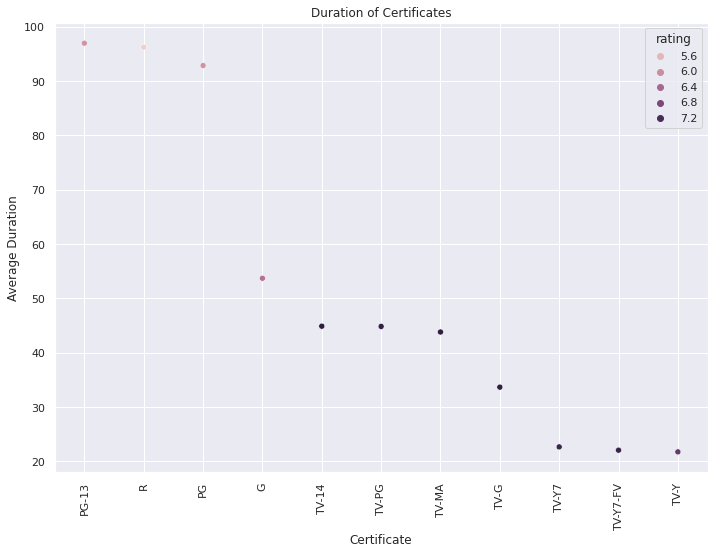

In [ ]:
# Plot the relationship between duration, rating, and certificates 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data = duration_certificate, x=duration_certificate.index, y = 'p_duration', hue = 'rating')
plt.xticks(rotation=90)
plt.xlabel('Certificate')
plt.ylabel('Average Duration')
plt.title('Duration of Certificates')
plt.show()

####**Answer to Question 4**

> **From the graph, TV series typically enjoy higher ratings on average for a relatively lower duration while movies are rated more poorly for a longer duration on average. Especially movies with an *R* certificate, have one of the longest duration for the poorest rating on average. Interestingly, movies with a *G* certifcate have roughly the same rating with close to all TV series' duration.**

### **3.5 Question 5**
**In addition to the factors discussed in the previous questions, such as `certificate`. Does the director influence on the movie's rating? In this dataset, we can determine the number of films each director has produced. What effect does this element have on the film rating?**

**Movie Rating Problem:** There are many single-digit votes in the dataset with surprisingly high ratings.

**Setting Thresholds for Movie Ratings：**The dataset selected by Q5 is similar to that of Q2, and also retains the rows with high votes to avoid excessive or low scores caused by too few votes. At the same time, Q5 processes the unknown data of the director column. ***Films with votes less than 100 are dropped***, because they are more likely than other data points to be outliers, since they are not representative enough compared to well-know films.

In [ ]:
# Filter out the films with less than 100 votes
df_q5 = df_q[df_q['p_votes'] > 100]

# Reorganize the original dataframe with relevant variables for Question 5
df_q5 = df_q5[['id', 'name', 'p_year', 'rating', 'p_votes', 'directors_id', 'directors_name']]

# Transform type of directors_name and directors_id into string
df_q5['directors_name'] = df_q5['directors_name'].astype('string')
df_q5['directors_id'] = df_q5['directors_id'].astype('string')

# Filter out the films with 'Anonymous' director
df_q5 = df_q5[df_q5['directors_name'] != 'nm0000000']
df_q5 = df_q5[df_q5['directors_name'] != 'Anonymous']

# Some films have multiple directors, the directors_name & directors_id are then splited into multiple rows
# so the movie id is having a one-to-many relationship with directors_name & directors_id (one movie can 
# have different directors, therefore appears in multiple rows.)
df_q5 = (df_q5.set_index(['id', 
                          'name', 
                          'p_year', 
                          'rating', 
                          'p_votes'])
          .apply(lambda x: x.str.split(',').explode())
          .reset_index())                  

df_q5.head()

,id,name,p_year,rating,p_votes,directors_id,directors_name
0,tt4710316,Best in Sex: 2015 AVN Awards,2015,4.0,124.0,nm1624094,Gary Miller
1,tt1281857,Naughty Novelist,2008,3.8,174.0,nm0045256,John Bacchus
2,tt6843596,Best in Sex: 2017 AVN Awards,2017,4.9,225.0,nm1624094,Gary Miller
3,tt3705604,AVN Awards 2014,2014,6.7,101.0,nm1624094,Gary Miller
4,tt0207195,Wadd: The Life & Times of John C. Holmes,1999,6.8,907.0,nm0256178,Wesley Emerson


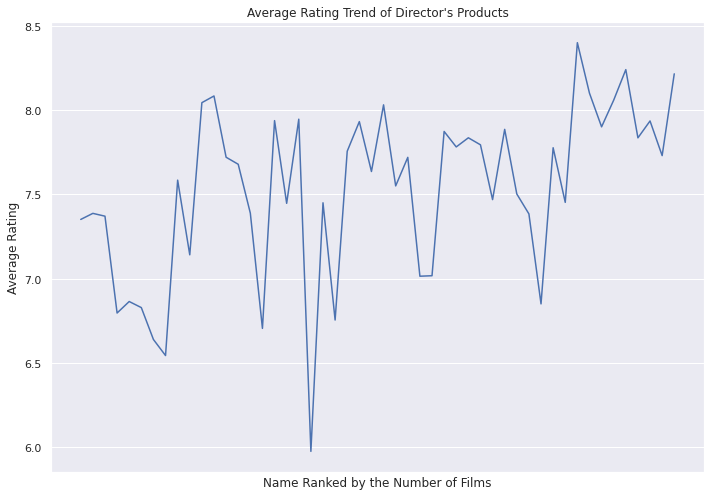

In [ ]:
# Count the number of films have been directed by each director
dic_df1 = df_q5.groupby(by ='directors_name').agg({"id":"count" , "rating":"mean"})
dic_df1 = dic_df1.sort_values(by = 'id', ascending = False)
dic_df1 = dic_df1.head(50)

# Make lineplot to try to find a linear relationship between average ratings and the number of films each director has directed
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(data = dic_df1, x=dic_df1.index, y = 'rating')
ax.set_xticks([])
plt.xticks(rotation=90)
plt.xlabel('Name Ranked by the Number of Films')
plt.title('''Average Rating Trend of Director's Products''')
plt.ylabel('Average Rating')
plt.show()

####**Answer to Question 5**


> **The linear relationship in the figure leads to the conclusion that the `rating` and the director's total number of films are not clearly correlated.**

###**Note: The number of movies that the director has directed decreases from left to right in the graph above.**


##**4. Conclusion**
**By analyzing the influence of `genre`, `certificate`, `duration`, and director on a production's rating, we conclude that after 2008, the audience's taste in genres changed from Action productions to TV-Shows. In certificates, TV series typically enjoy higher ratings on average for a relatively lower duration while movies are rated more poorly for a longer duration on average. From our findings on directors, we conclude that the number of films a director has produced does not have a relationship with the ratings of those films.**

**We make the following recommendations to the production companies based on our analysis:**
1. **Consumers' habit of watching a production in their leisure time has evolved from *action movies*/*tv-series* to *talk-shows*.**
1. **TV-series with shorter duration usually have a better chance of obtaining a higher rating than movies with a longer duration.**
1. **A director's total number of production has little to no effect on the quality of those productions, companies should not value too much on the number of productions.**

## **5. Reference**

[1] IMDB weibsite: https://www.imdb.com/?ref_=nv_home

[2] Top 250 films: https://www.imdb.com/chart/top/

[3] Film rating system: https://www.motionpictures.org/film-ratings/

[4] Jargons definition: https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27#
